<a href="https://colab.research.google.com/github/Kynantio/MachineLearning/blob/main/Jobsheet_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 9 Machine Learning
### Kynantio Candra Abrari
### 2141720206 / 3A / 16

## Praktikum 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Polinema/Machine Learning/Jobsheet 7/iris.csv', header=None)

df.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


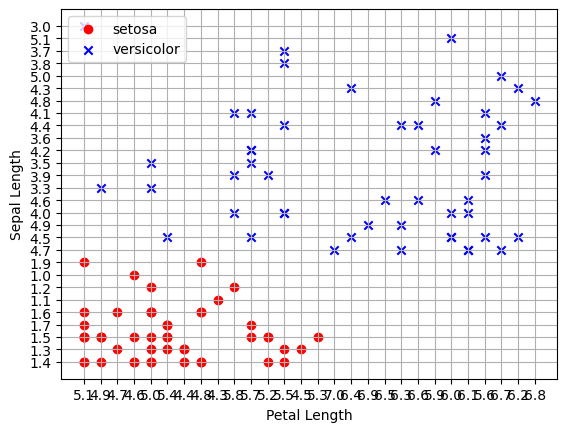

In [3]:
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 1, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
y = df.iloc[1:101, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[1:101, [3, 1]].values # slice data latih

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X.astype(float), y)

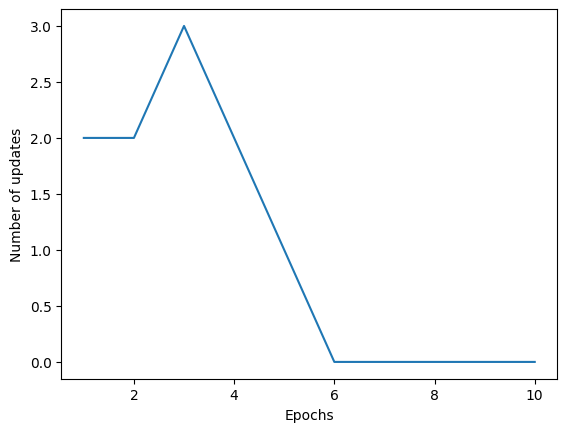

In [7]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

## Praktikum 2

In [9]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [10]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Praktikum 3

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [14]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [15]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/Polinema/Machine Learning/Jobsheet 8/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [18]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)D
X_test = sc.transform(X_test)

In [23]:
ann = tf.keras.models.Sequential()

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [26]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5861 - accuracy: 0.7334
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8076
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8156
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8200
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8274
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8359
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8386
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3733 - accura

In [29]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 97ms/step
[[False]]


In [30]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1533   62]
 [ 208  197]]


0.865

## Tugas

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.
DIKERJAKAN SECARA BERKELOMPOK
JELASKAN HASIL YANG ANDA DAPATKAN,
AKURASI
CONFUSION MATRIX
KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [32]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from collections import Counter

In [33]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
# Melihat dimensi data
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(mnist.target.unique()))

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


In [35]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


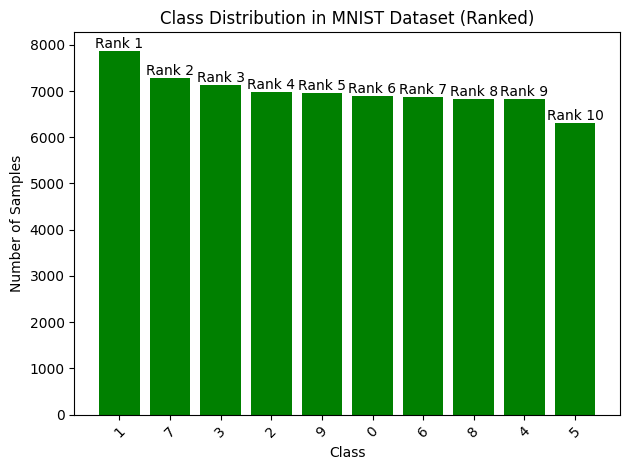

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)

# Sort the class_counts in descending order
sorted_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Extract class labels and counts
class_labels = [str(key) for key in sorted_counts.keys()]
counts = list(sorted_counts.values())

# Create a bar chart with green bars
plt.bar(class_labels, counts, color='green')

# Add ranking as text on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, f"Rank {i+1}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset (Ranked)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (56000, 784)
The shape of the training labels: (56000,)
The shape of the testing inputs: (14000, 784)
The shape of the testing labels: (14000,)


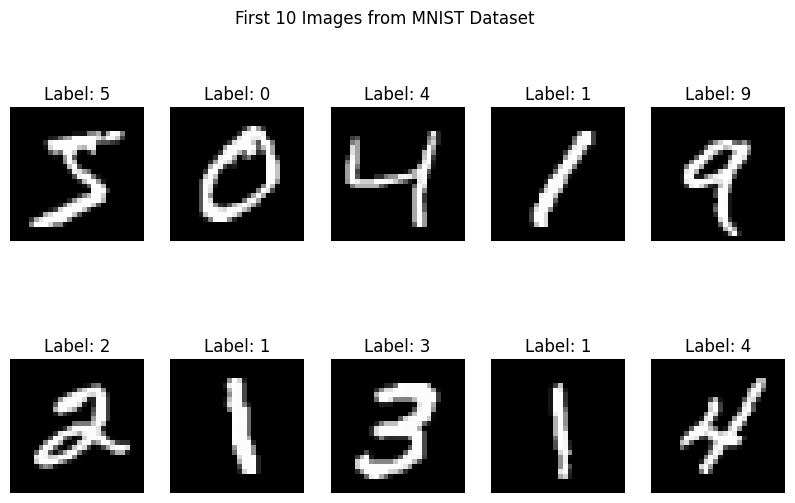

In [38]:
# Convert x to a NumPy array
x_convert = x.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):A
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns, and i+1-th subplot
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

In [39]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# process the data before training
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# build the model ANN
model = tf.keras.models.Sequential()

# build layers
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 classes for MNIST

# compile the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/25
560/560 [==============================] - 3s 5ms/step - loss: 1.9470 - accuracy: 0.3079 - val_loss: 1.3374 - val_accuracy: 0.5021
Epoch 2/25
560/560 [==============================] - 4s 8ms/step - loss: 1.1562 - accuracy: 0.5921 - val_loss: 1.0175 - val_accuracy: 0.6560
Epoch 3/25
560/560 [==============================] - 3s 5ms/step - loss: 0.8861 - accuracy: 0.7075 - val_loss: 0.8169 - val_accuracy: 0.7276
Epoch 4/25
560/560 [==============================] - 2s 4ms/step - loss: 0.7511 - accuracy: 0.7525 - val_loss: 0.7400 - val_accuracy: 0.7619
Epoch 5/25
560/560 [==============================] - 2s 4ms/step - loss: 0.7009 - accuracy: 0.7700 - val_loss: 0.7012 - val_accuracy: 0.7769
Epoch 6/25
560/560 [==============================] - 3s 5ms/step - loss: 0.6692 - accuracy: 0.7837 - val_loss: 0.6809 - val_accuracy: 0.7829
Epoch 7/25
560/560 [==============================] - 3s 6ms/step - loss: 0.6471 - accuracy: 0.7948 - val_loss: 0.6765 - val_accuracy: 0.7877
Epoch 

In [42]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.9040
0.3308626413345337
0.9039999842643738


438/438 [==============================] - 1s 2ms/step


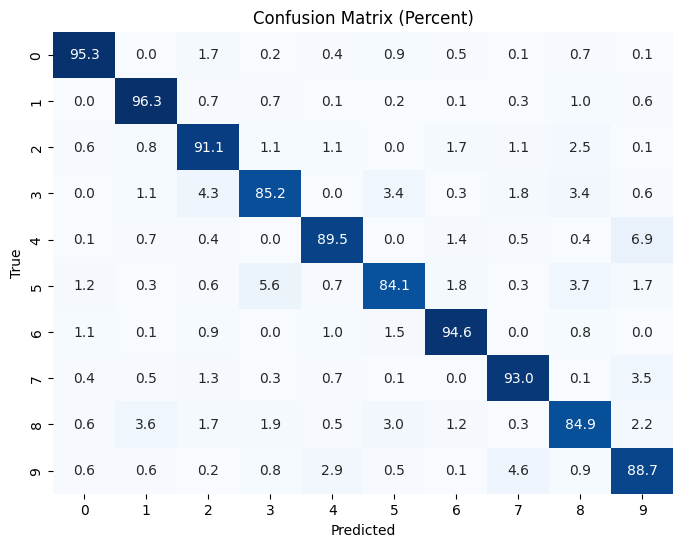

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and have predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Convert counts to percentages
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with percentages
sns.heatmap(confusion_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix (Percent)')

# Add class labels to the x and y axis
class_labels = [str(i) for i in range(10)]  # Assuming you have 10 classes
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Display the plot
plt.show()